In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('')

In [3]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
data.shape

(768, 10)

In [5]:
#feature engineering
data.isnull().values.any()


False

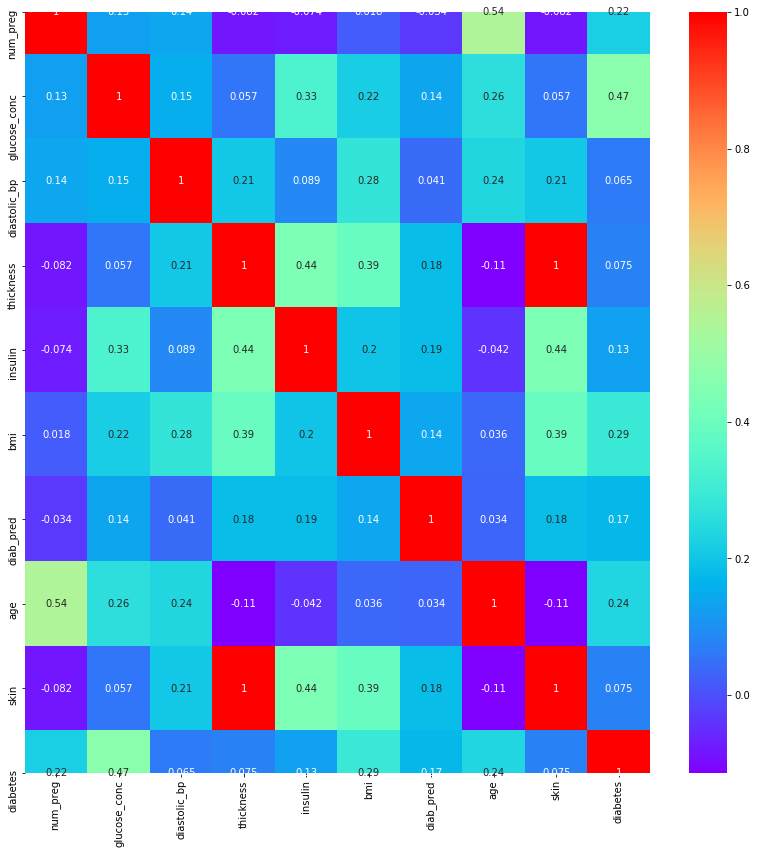

In [6]:
#correlation
import seaborn as sns
from matplotlib import pyplot as plt
cor=data.corr()
top_corr_features=cor.index
plt.figure(figsize=(14,14))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='rainbow')

In [7]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [8]:
diabetes_map={True:1,False:0}

In [9]:
#changind data from boolean to int
data['diabetes']=data['diabetes'].map(diabetes_map)

In [10]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [11]:
diabetes_true_count=len(data.loc[data['diabetes']==True])
diabetes_false_count=len(data.loc[data['diabetes']==False])

In [12]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [13]:
#train test
from sklearn.model_selection import train_test_split
feature_columns = ['num_preg','glucose_conc','diastolic_bp','insulin','bmi','diab_pred','age','skin']
predicted_class = ['diabetes']

In [14]:
X = data[feature_columns].values
Y = data[predicted_class].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [15]:
#check how many missing values are zeros
print('total number of rows :{0}'.format(len(data)))
print('number of rows are missing in num_preg : {0}'.format(len(data.loc[data['num_preg']==0])))
print('number of rows missing in glucose_conc : {0}'.format(len(data.loc[data['glucose_conc']==0])))
print('numbers of rows missing in diastolic_bp : {0}'.format(len(data.loc[data['diastolic_bp']==0])))
print('numbers of rows missing in insulin : {0}'.format(len(data.loc[data['insulin']==0])))
print('numbers of rows missing in bmi : {0}'.format(len(data.loc[data['bmi']==0])))
print('numbers of rows missing in diab_pred : {0}'.format(len(data.loc[data['diab_pred']==0])))
print('numbers of rows missing in age : {0}'.format(len(data.loc[data['age']==0])))                                                                              
print('numbers of rows missing in skin : {0}'.format(len(data.loc[data['skin']==0])))                                                                              

total number of rows :768
number of rows are missing in num_preg : 111
number of rows missing in glucose_conc : 5
numbers of rows missing in diastolic_bp : 35
numbers of rows missing in insulin : 374
numbers of rows missing in bmi : 11
numbers of rows missing in diab_pred : 0
numbers of rows missing in age : 0
numbers of rows missing in skin : 227


In [16]:
from sklearn.preprocessing import Imputer

fill_values=Imputer(missing_values=0,strategy='mean',axis=0)

X=fill_values.fit_transform(x_train)
Y=fill_values.fit_transform(y_train)

C:\Users\Guest user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest_model=RandomForestClassifier(random_state=10)

Random_Forest_model.fit(x_train,y_train.ravel())

C:\Users\Guest user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [23]:
predict_train_data=Random_Forest_model.predict(x_test)
from sklearn import metrics
print('Accuracy score {0}'.format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy score 0.7186147186147186


In [2]:
#hyper parameter optimization
params={
    'learning_rate':[0.5,1.0,1.5,2.0,2.5,3.0],
    'max_depth':[3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [4]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [5]:
classifier=xgboost.XGBClassifier()

In [8]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=-3)

In [9]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        
        print('\n Time Taken:%i hours %i minutes %s seconds.'%(thour,tmin,round(tsec,2)))